# Comparative Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
kz_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/kz_data_en_clean.csv')
foreign_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/data_clean/student_portuguese_clean.csv')

In [4]:
all_models = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/ensemble/all_models_comparison.csv')

In [5]:
try:
    rq2_gender = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq2_gender.csv')
    rq3_living = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq3_living.csv')
    rq4_family = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/statistical/rq4_family_size.csv')
except:
    print("Some statistical results not found. Proceeding with available data...")

print("Data loaded successfully!")


Data loaded successfully!


# Descriptive Statistics Comparison

In [7]:
def compare_descriptive_stats(kz_df, foreign_df):
    """Compare descriptive statistics"""
    print("="*60)
    print("DESCRIPTIVE STATISTICS COMPARISON")
    print("="*60)
    comparison = pd.DataFrame({
        'Metric': ['Sample Size', 'Mean GPA', 'Median GPA', 'Std Dev GPA', 
                   'Min GPA', 'Max GPA', 'Skewness', 'Kurtosis'],
        'Kazakhstan': [
            len(kz_df),
            kz_df['gpa'].mean(),
            kz_df['gpa'].median(),
            kz_df['gpa'].std(),
            kz_df['gpa'].min(),
            kz_df['gpa'].max(),
            kz_df['gpa'].skew(),
            kz_df['gpa'].kurtosis()
        ],
        'Foreign': [
            len(foreign_df),
            foreign_df['final_grade'].mean(),
            foreign_df['final_grade'].median(),
            foreign_df['final_grade'].std(),
            foreign_df['final_grade'].min(),
            foreign_df['final_grade'].max(),
            foreign_df['final_grade'].skew(),
            foreign_df['final_grade'].kurtosis()
        ]
    })
    
    # Calculate difference
    comparison['Difference'] = comparison['Foreign'] - comparison['Kazakhstan']
    comparison['Pct_Diff'] = ((comparison['Foreign'] - comparison['Kazakhstan']) / 
                              comparison['Kazakhstan'] * 100)
    
    print("\n", comparison.round(3))
    
    return comparison

comparison_stats = compare_descriptive_stats(kz_data, foreign_data)

DESCRIPTIVE STATISTICS COMPARISON

         Metric  Kazakhstan  Foreign  Difference  Pct_Diff
0  Sample Size     121.000  649.000     528.000   436.364
1     Mean GPA       3.103    1.765      -1.338   -43.111
2   Median GPA       3.200    2.000      -1.200   -37.500
3  Std Dev GPA       0.719    1.155       0.436    60.699
4      Min GPA       0.000    0.000       0.000       NaN
5      Max GPA       4.000    4.000       0.000     0.000
6     Skewness      -2.247    0.043       2.290  -101.914
7     Kurtosis       7.104   -1.063      -8.167  -114.969


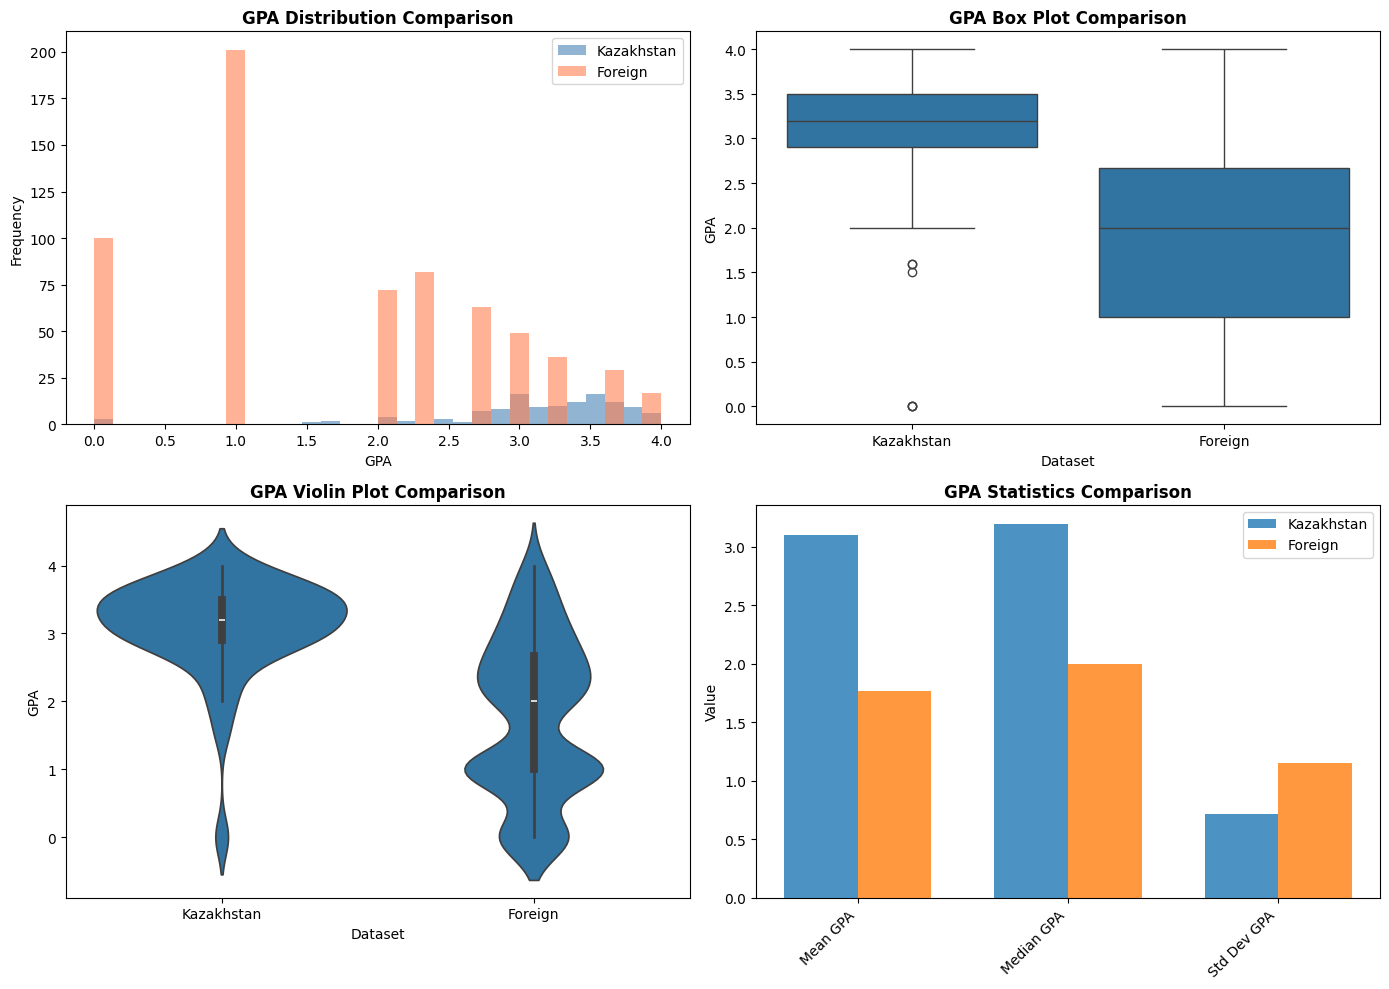

In [12]:
# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GPA Distribution comparison
axes[0, 0].hist(kz_data['gpa'], bins=30, alpha=0.6, label='Kazakhstan', color='steelblue')
axes[0, 0].hist(foreign_data['final_grade'], bins=30, alpha=0.6, label='Foreign', color='coral')
axes[0, 0].set_xlabel('GPA')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('GPA Distribution Comparison', fontweight='bold')
axes[0, 0].legend()

# Box plot comparison
data_for_box = pd.DataFrame({
    'GPA': list(kz_data['gpa']) + list(foreign_data['final_grade']),
    'Dataset': ['Kazakhstan']*len(kz_data) + ['Foreign']*len(foreign_data)
})
sns.boxplot(data=data_for_box, x='Dataset', y='GPA', ax=axes[0, 1])
axes[0, 1].set_title('GPA Box Plot Comparison', fontweight='bold')

# Violin plot
sns.violinplot(data=data_for_box, x='Dataset', y='GPA', ax=axes[1, 0])
axes[1, 0].set_title('GPA Violin Plot Comparison', fontweight='bold')

# Statistical summary bar chart
metrics = ['Mean GPA', 'Median GPA', 'Std Dev GPA']
kz_values = [kz_data['gpa'].mean(), kz_data['gpa'].median(), kz_data['gpa'].std()]
foreign_values = [foreign_data['final_grade'].mean(), foreign_data['final_grade'].median(), foreign_data['final_grade'].std()]

x = np.arange(len(metrics))
width = 0.35

axes[1, 1].bar(x - width/2, kz_values, width, label='Kazakhstan', alpha=0.8)
axes[1, 1].bar(x + width/2, foreign_values, width, label='Foreign', alpha=0.8)
axes[1, 1].set_ylabel('Value')
axes[1, 1].set_title('GPA Statistics Comparison', fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics, rotation=45, ha='right')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/comparative/descriptive_stats_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


# Statistical Significance Test

In [16]:
# T-test for GPA difference
t_stat, p_value = stats.ttest_ind(kz_data['gpa'], foreign_data['final_grade'])

print("\n" + "="*60)
print("STATISTICAL SIGNIFICANCE TEST")
print("="*60)
print(f"\nIndependent t-test for GPA difference:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("\n✓ Statistically significant difference between datasets (p < 0.05)")
    print(f"Effect size (Cohen's d): {(kz_data['gpa'].mean() - foreign_data['final_grade'].mean()) / np.sqrt((kz_data['gpa'].std()**2 + foreign_data['final_grade'].std()**2) / 2):.3f}")
else:
    print("\n✗ No statistically significant difference between datasets (p >= 0.05)")


STATISTICAL SIGNIFICANCE TEST

Independent t-test for GPA difference:
t-statistic: 12.3029
p-value: 0.0000

✓ Statistically significant difference between datasets (p < 0.05)
Effect size (Cohen's d): 1.391


# Model Performance Comparison

In [17]:
print("\n" + "="*60)
print("MODEL PERFORMANCE COMPARISON")
print("="*60)

# Get best models for each dataset
kz_models = all_models[all_models['Dataset'] == 'Kazakhstan'].sort_values('Test_R2', ascending=False)
foreign_models = all_models[all_models['Dataset'] == 'Foreign'].sort_values('Test_R2', ascending=False)

print("\nTop 3 Models - Kazakhstan:")
print(kz_models[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE']].head(3))

print("\nTop 3 Models - Foreign:")
print(foreign_models[['Model', 'Test_R2', 'Test_RMSE', 'Test_MAE']].head(3))


MODEL PERFORMANCE COMPARISON

Top 3 Models - Kazakhstan:
                Model   Test_R2  Test_RMSE  Test_MAE
3         Elastic Net  0.119526   0.785628  0.513116
9   Gradient Boosting  0.104765   0.792186  0.580991
10           AdaBoost  0.090656   0.798405  0.515771

Top 3 Models - Foreign:
                Model   Test_R2  Test_RMSE  Test_MAE
11      Random Forest  0.911194   0.349974  0.255560
12  Gradient Boosting  0.905807   0.360431  0.278147
13           AdaBoost  0.893719   0.382862  0.322706


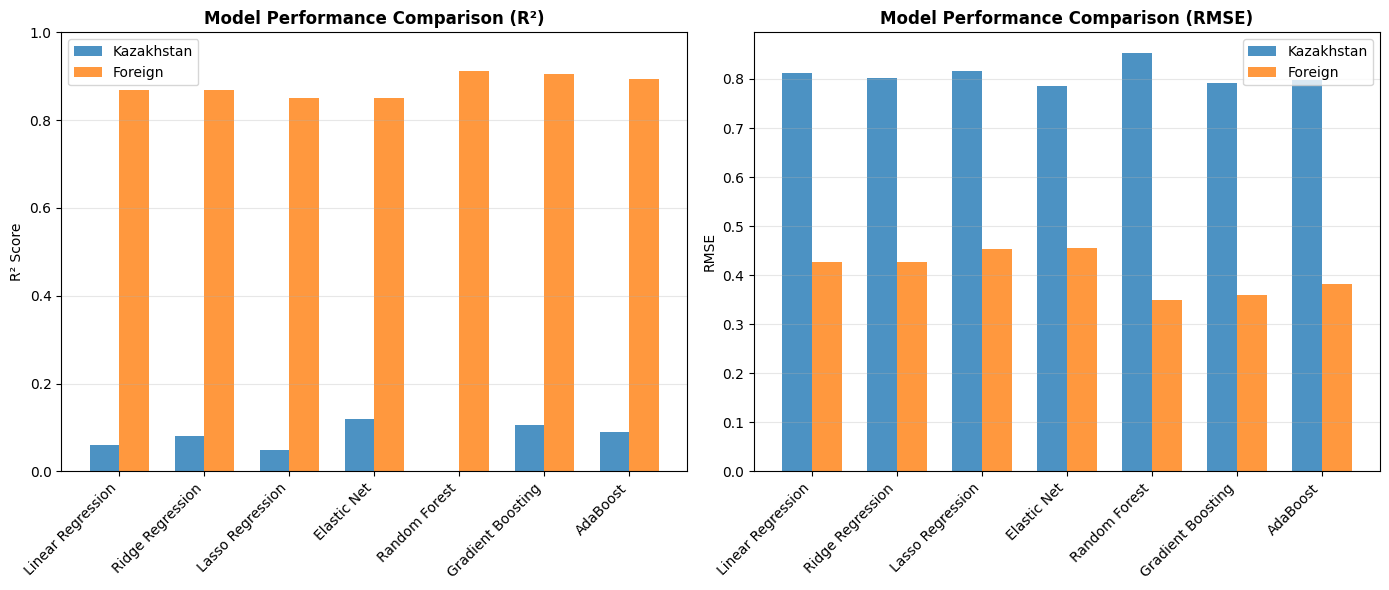

In [19]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² comparison
model_names = all_models['Model'].unique()
kz_r2_dict = dict(zip(kz_models['Model'], kz_models['Test_R2']))
foreign_r2_dict = dict(zip(foreign_models['Model'], foreign_models['Test_R2']))

kz_r2 = [kz_r2_dict.get(m, 0) for m in model_names]
foreign_r2 = [foreign_r2_dict.get(m, 0) for m in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0].bar(x - width/2, kz_r2, width, label='Kazakhstan', alpha=0.8)
axes[0].bar(x + width/2, foreign_r2, width, label='Foreign', alpha=0.8)
axes[0].set_ylabel('R² Score')
axes[0].set_title('Model Performance Comparison (R²)', fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend()
axes[0].set_ylim([0, 1])
axes[0].grid(axis='y', alpha=0.3)

# RMSE comparison
kz_rmse_dict = dict(zip(kz_models['Model'], kz_models['Test_RMSE']))
foreign_rmse_dict = dict(zip(foreign_models['Model'], foreign_models['Test_RMSE']))

kz_rmse = [kz_rmse_dict.get(m, 0) for m in model_names]
foreign_rmse = [foreign_rmse_dict.get(m, 0) for m in model_names]

axes[1].bar(x - width/2, kz_rmse, width, label='Kazakhstan', alpha=0.8)
axes[1].bar(x + width/2, foreign_rmse, width, label='Foreign', alpha=0.8)
axes[1].set_ylabel('RMSE')
axes[1].set_title('Model Performance Comparison (RMSE)', fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(model_names, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/comparative/model_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance Comparison


FEATURE IMPORTANCE COMPARISON

Top 10 Important Features - Kazakhstan:
                   Feature  Importance
0         living_situation    0.199580
1                      age    0.166866
2              course_year    0.113599
3         father_education    0.109676
4       study_hours_weekly    0.079795
5            course_year_3    0.063809
6     class_absences_Often    0.061614
7           class_absences    0.060076
8    study_hours_weekly_<5    0.033794
9  study_hours_weekly_5-10    0.029668

Top 10 Important Features - Foreign:
                                          Feature  Importance
0                                         grade_2    0.859269
1                                         grade_1    0.045448
2                                      student_id    0.042147
3                                 weekend_alcohol    0.012181
4                                      mother_job    0.010385
5                                 weekday_alcohol    0.007533
6                          

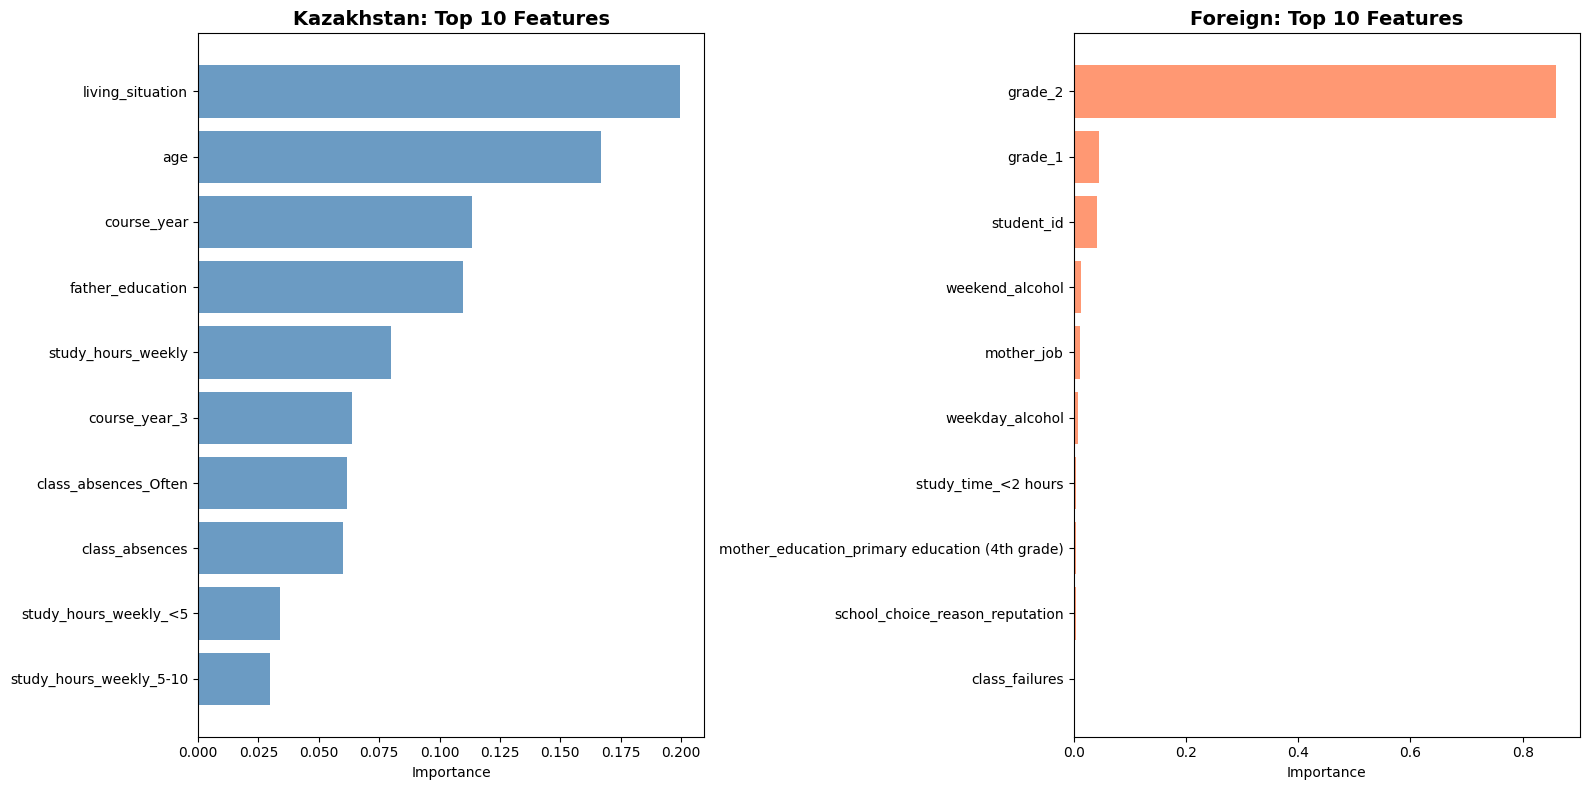

In [20]:
# Load feature importance results
try:
    kz_rf_importance = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/ensemble/kz_rf_feature_importance.csv')
    foreign_rf_importance = pd.read_csv('/Users/kassi/Data Mining/Final/Code/report/ensemble/foreign_rf_feature_importance.csv')
    
    print("\n" + "="*60)
    print("FEATURE IMPORTANCE COMPARISON")
    print("="*60)
    
    print("\nTop 10 Important Features - Kazakhstan:")
    print(kz_rf_importance.head(10)[['Feature', 'Importance']])
    
    print("\nTop 10 Important Features - Foreign:")
    print(foreign_rf_importance.head(10)[['Feature', 'Importance']])
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    axes[0].barh(kz_rf_importance['Feature'].head(10), 
                 kz_rf_importance['Importance'].head(10), 
                 alpha=0.8, color='steelblue')
    axes[0].set_xlabel('Importance')
    axes[0].set_title('Kazakhstan: Top 10 Features', fontweight='bold', fontsize=14)
    axes[0].invert_yaxis()
    
    axes[1].barh(foreign_rf_importance['Feature'].head(10), 
                 foreign_rf_importance['Importance'].head(10), 
                 alpha=0.8, color='coral')
    axes[1].set_xlabel('Importance')
    axes[1].set_title('Foreign: Top 10 Features', fontweight='bold', fontsize=14)
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.savefig('../results/figures/feature_importance_comparison.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
except FileNotFoundError:
    print("\nFeature importance files not found. Skipping this comparison.")


# Research Questions Comparison

In [21]:
def compare_research_questions():
    """Compare answers to research questions"""
    print("\n" + "="*60)
    print("RESEARCH QUESTIONS COMPARISON")
    print("="*60)
    
    # RQ2: Gender
    if 'rq2_gender' in dir():
        print("\nRQ2: Gender Impact on GPA")
        print(rq2_gender)
        
        if len(rq2_gender) == 2:
            kz_gender = rq2_gender[rq2_gender['Dataset'] == 'Kazakhstan'].iloc[0]
            foreign_gender = rq2_gender[rq2_gender['Dataset'] == 'Foreign'].iloc[0]
            
            print(f"\nKazakhstan: {'Significant' if kz_gender['Significant'] else 'Not significant'} (p={kz_gender['P_Value']:.4f})")
            print(f"Foreign: {'Significant' if foreign_gender['Significant'] else 'Not significant'} (p={foreign_gender['P_Value']:.4f})")
    
    # RQ3: Living Situation
    if 'rq3_living' in dir():
        print("\n\nRQ3: Living Situation Impact on GPA")
        print(rq3_living)
    
    # RQ4: Family Size
    if 'rq4_family' in dir():
        print("\n\nRQ4: Family Size Correlation with GPA")
        print(rq4_family)

compare_research_questions()


RESEARCH QUESTIONS COMPARISON


# Universal vs Country-Specific Factors

In [22]:
print("\n" + "="*60)
print("UNIVERSAL VS COUNTRY-SPECIFIC FACTORS")
print("="*60)

# This analysis identifies common and unique important features
universal_factors = []
kz_specific = []
foreign_specific = []

if 'kz_rf_importance' in dir() and 'foreign_rf_importance' in dir():
    # Get top features from both
    kz_top = set(kz_rf_importance.head(10)['Feature'])
    foreign_top = set(foreign_rf_importance.head(10)['Feature'])
    
    # Universal factors (appear in both top 10)
    universal_factors = list(kz_top.intersection(foreign_top))
    
    # Country-specific factors
    kz_specific = list(kz_top - foreign_top)
    foreign_specific = list(foreign_top - kz_top)
    
    print(f"\nUniversal Factors ({len(universal_factors)}):")
    for factor in universal_factors:
        print(f"  • {factor}")
    
    print(f"\nKazakhstan-Specific Factors ({len(kz_specific)}):")
    for factor in kz_specific:
        print(f"  • {factor}")
    
    print(f"\nForeign-Specific Factors ({len(foreign_specific)}):")
    for factor in foreign_specific:
        print(f"  • {factor}")


UNIVERSAL VS COUNTRY-SPECIFIC FACTORS

Universal Factors (0):

Kazakhstan-Specific Factors (10):
  • study_hours_weekly_5-10
  • class_absences
  • father_education
  • study_hours_weekly
  • course_year_3
  • living_situation
  • study_hours_weekly_<5
  • age
  • course_year
  • class_absences_Often

Foreign-Specific Factors (10):
  • grade_2
  • study_time_<2 hours
  • weekday_alcohol
  • school_choice_reason_reputation
  • grade_1
  • weekend_alcohol
  • student_id
  • mother_education_primary education (4th grade)
  • class_failures
  • mother_job


# Cross-Cultural Insights

In [24]:
print("\n" + "="*60)
print("CROSS-CULTURAL INSIGHTS")
print("="*60)

insights = []

# GPA level comparison
if kz_data['gpa'].mean() > foreign_data['final_grade'].mean():
    insights.append(f"Kazakhstan students have higher average GPA ({kz_data['gpa'].mean():.2f}) compared to Foreign ({foreign_data['final_grade'].mean():.2f})")
else:
    insights.append(f"Foreign students have higher average GPA ({foreign_data['final_grade'].mean():.2f}) compared to Kazakhstan ({kz_data['gpa'].mean():.2f})")

# Variability
if kz_data['gpa'].std() > foreign_data['final_grade'].std():
    insights.append(f"Kazakhstan shows higher GPA variability (std={kz_data['gpa'].std():.2f}) suggesting more diverse academic outcomes")
else:
    insights.append(f"Foreign dataset shows higher GPA variability (std={foreign_data['final_grade'].std():.2f}) suggesting more diverse academic outcomes")

# Model performance
kz_best_r2 = kz_models.iloc[0]['Test_R2']
foreign_best_r2 = foreign_models.iloc[0]['Test_R2']

if kz_best_r2 > foreign_best_r2:
    insights.append(f"Models perform better on Kazakhstan data (R²={kz_best_r2:.3f}) vs Foreign (R²={foreign_best_r2:.3f})")
else:
    insights.append(f"Models perform better on Foreign data (R²={foreign_best_r2:.3f}) vs Kazakhstan (R²={kz_best_r2:.3f})")

# Print insights
print("\nKey Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


CROSS-CULTURAL INSIGHTS

Key Insights:
1. Kazakhstan students have higher average GPA (3.10) compared to Foreign (1.77)
2. Foreign dataset shows higher GPA variability (std=1.15) suggesting more diverse academic outcomes
3. Models perform better on Foreign data (R²=0.911) vs Kazakhstan (R²=0.120)


# Comprehensive Comparison Table

In [25]:
comprehensive_comparison = pd.DataFrame({
    'Aspect': [
        'Sample Size',
        'Mean GPA',
        'GPA Std Dev',
        'Best Model',
        'Best Model R²',
        'Best Model RMSE',
        'Top 1 Feature',
        'Significant Gender Effect'
    ],
    'Kazakhstan': [
        len(kz_data),
        f"{kz_data['gpa'].mean():.3f}",
        f"{kz_data['gpa'].std():.3f}",
        kz_models.iloc[0]['Model'],
        f"{kz_models.iloc[0]['Test_R2']:.3f}",
        f"{kz_models.iloc[0]['Test_RMSE']:.3f}",
        kz_rf_importance.iloc[0]['Feature'] if 'kz_rf_importance' in dir() else 'N/A',
        'Yes' if 'rq2_gender' in dir() and rq2_gender[rq2_gender['Dataset']=='Kazakhstan'].iloc[0]['Significant'] else 'N/A'
    ],
    'Foreign': [
        len(foreign_data),
        f"{foreign_data['final_grade'].mean():.3f}",
        f"{foreign_data['final_grade'].std():.3f}",
        foreign_models.iloc[0]['Model'],
        f"{foreign_models.iloc[0]['Test_R2']:.3f}",
        f"{foreign_models.iloc[0]['Test_RMSE']:.3f}",
        foreign_rf_importance.iloc[0]['Feature'] if 'foreign_rf_importance' in dir() else 'N/A',
        'Yes' if 'rq2_gender' in dir() and rq2_gender[rq2_gender['Dataset']=='Foreign'].iloc[0]['Significant'] else 'N/A'
    ]
})

print("\n" + "="*60)
print("COMPREHENSIVE COMPARISON TABLE")
print("="*60)
print("\n", comprehensive_comparison.to_string(index=False))



COMPREHENSIVE COMPARISON TABLE

                    Aspect       Kazakhstan       Foreign
              Sample Size              121           649
                 Mean GPA            3.103         1.765
              GPA Std Dev            0.719         1.155
               Best Model      Elastic Net Random Forest
            Best Model R²            0.120         0.911
          Best Model RMSE            0.786         0.350
            Top 1 Feature living_situation       grade_2
Significant Gender Effect              N/A           Yes


In [26]:
comprehensive_comparison.to_csv('/Users/kassi/Data Mining/Final/Code/report/comparartive/comprehensive_comparison.csv', index=False)
print("\nComprehensive comparison saved!")


Comprehensive comparison saved!


# Summary of Key Findings

In [27]:
print("\n" + "="*70)
print(" " * 20 + "KEY FINDINGS SUMMARY")
print("="*70)

print("\n1. DATASET CHARACTERISTICS:")
print(f"   • Kazakhstan: n={len(kz_data)}, Mean GPA={kz_data['gpa'].mean():.2f}")
print(f"   • Foreign: n={len(foreign_data)}, Mean GPA={foreign_data['final_grade'].mean():.2f}")
print(f"   • Statistical difference: {'Yes' if p_value < 0.05 else 'No'} (p={p_value:.4f})")

print("\n2. MODEL PERFORMANCE:")
print(f"   • Best Kazakhstan Model: {kz_models.iloc[0]['Model']} (R²={kz_models.iloc[0]['Test_R2']:.3f})")
print(f"   • Best Foreign Model: {foreign_models.iloc[0]['Model']} (R²={foreign_models.iloc[0]['Test_R2']:.3f})")

if len(universal_factors) > 0:
    print(f"\n3. UNIVERSAL FACTORS ({len(universal_factors)}):")
    for factor in universal_factors[:5]:
        print(f"   • {factor}")

if len(kz_specific) > 0:
    print(f"\n4. KAZAKHSTAN-SPECIFIC FACTORS:")
    for factor in kz_specific[:3]:
        print(f"   • {factor}")

if len(foreign_specific) > 0:
    print(f"\n5. FOREIGN-SPECIFIC FACTORS:")
    for factor in foreign_specific[:3]:
        print(f"   • {factor}")

print("\n" + "="*70)


                    KEY FINDINGS SUMMARY

1. DATASET CHARACTERISTICS:
   • Kazakhstan: n=121, Mean GPA=3.10
   • Foreign: n=649, Mean GPA=1.77
   • Statistical difference: Yes (p=0.0000)

2. MODEL PERFORMANCE:
   • Best Kazakhstan Model: Elastic Net (R²=0.120)
   • Best Foreign Model: Random Forest (R²=0.911)

4. KAZAKHSTAN-SPECIFIC FACTORS:
   • study_hours_weekly_5-10
   • class_absences
   • father_education

5. FOREIGN-SPECIFIC FACTORS:
   • grade_2
   • study_time_<2 hours
   • weekday_alcohol



# Save All Comparative Results

In [29]:
comparison_stats.to_csv('/Users/kassi/Data Mining/Final/Code/report/comparartive/comparison_statistics.csv', index=False)

# Save insights
insights_df = pd.DataFrame({
    'Insight': insights
})
insights_df.to_csv('/Users/kassi/Data Mining/Final/Code/report/comparartive/cross_cultural_insights.csv', index=False)

print("\n✓ All comparative analysis results saved!")
print("✓ Comparison complete!")


✓ All comparative analysis results saved!
✓ Comparison complete!
